In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import __version__ as sklearn_version
from sklearn.model_selection import train_test_split

#df_tree=pd.read_csv('C:\Users\Jason\Desktop\MLdata.csv')

#read the excel files
#df_tree= pd.read_csv('C:/Users/Jason/Desktop/MLdata.csv')
#df_tree_test = pd.read_csv('C:/Users/MI/Desktop/testing.csv')

#combine both excel files
#frames = [df_tree_train, df_tree_test]
#df_tree = pd.concat(frames)

#sort by class
#df_tree = df_tree.sort_values(by=['class'])

#read the excel files
df_tree_train = pd.read_csv('C:/Users/MI/Desktop/training.csv')
df_tree_test = pd.read_csv('C:/Users/MI/Desktop/testing.csv')

#combine both excel files
frames = [df_tree_train, df_tree_test]
df_tree = pd.concat(frames)

df_tree.head()

,class,b1,b2,b3,b4,b5,b6,b7,b8,b9,...,pred_minus_obs_H_b9,pred_minus_obs_S_b1,pred_minus_obs_S_b2,pred_minus_obs_S_b3,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b8,pred_minus_obs_S_b9
0,d,39,36,57,91,59,101,93,27,60,...,-2.36,-18.41,-1.88,-6.43,-21.03,-1.60,-6.18,-22.50,-5.20,-7.86
1,h,84,30,57,112,51,98,92,26,62,...,-2.26,-16.27,-1.95,-6.25,-18.79,-1.99,-6.18,-23.41,-8.87,-10.83
2,s,53,25,49,99,51,93,84,26,58,...,-1.46,-15.92,-1.79,-4.64,-17.73,-0.48,-4.69,-19.97,-4.10,-7.07
3,s,59,26,49,103,47,92,82,25,56,...,2.68,-13.77,-2.53,-6.34,-22.03,-2.34,-6.60,-27.10,-7.99,-10.81
4,d,57,49,66,103,64,106,114,28,59,...,-2.94,-21.74,-1.64,-4.62,-23.74,-0.85,-5.50,-22.83,-2.74,-5.84


In [4]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()
    
import warnings 
warnings.filterwarnings("ignore")

In [5]:
#Indtroduce the Exploratory Data Analysis

C:\Users\MI\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


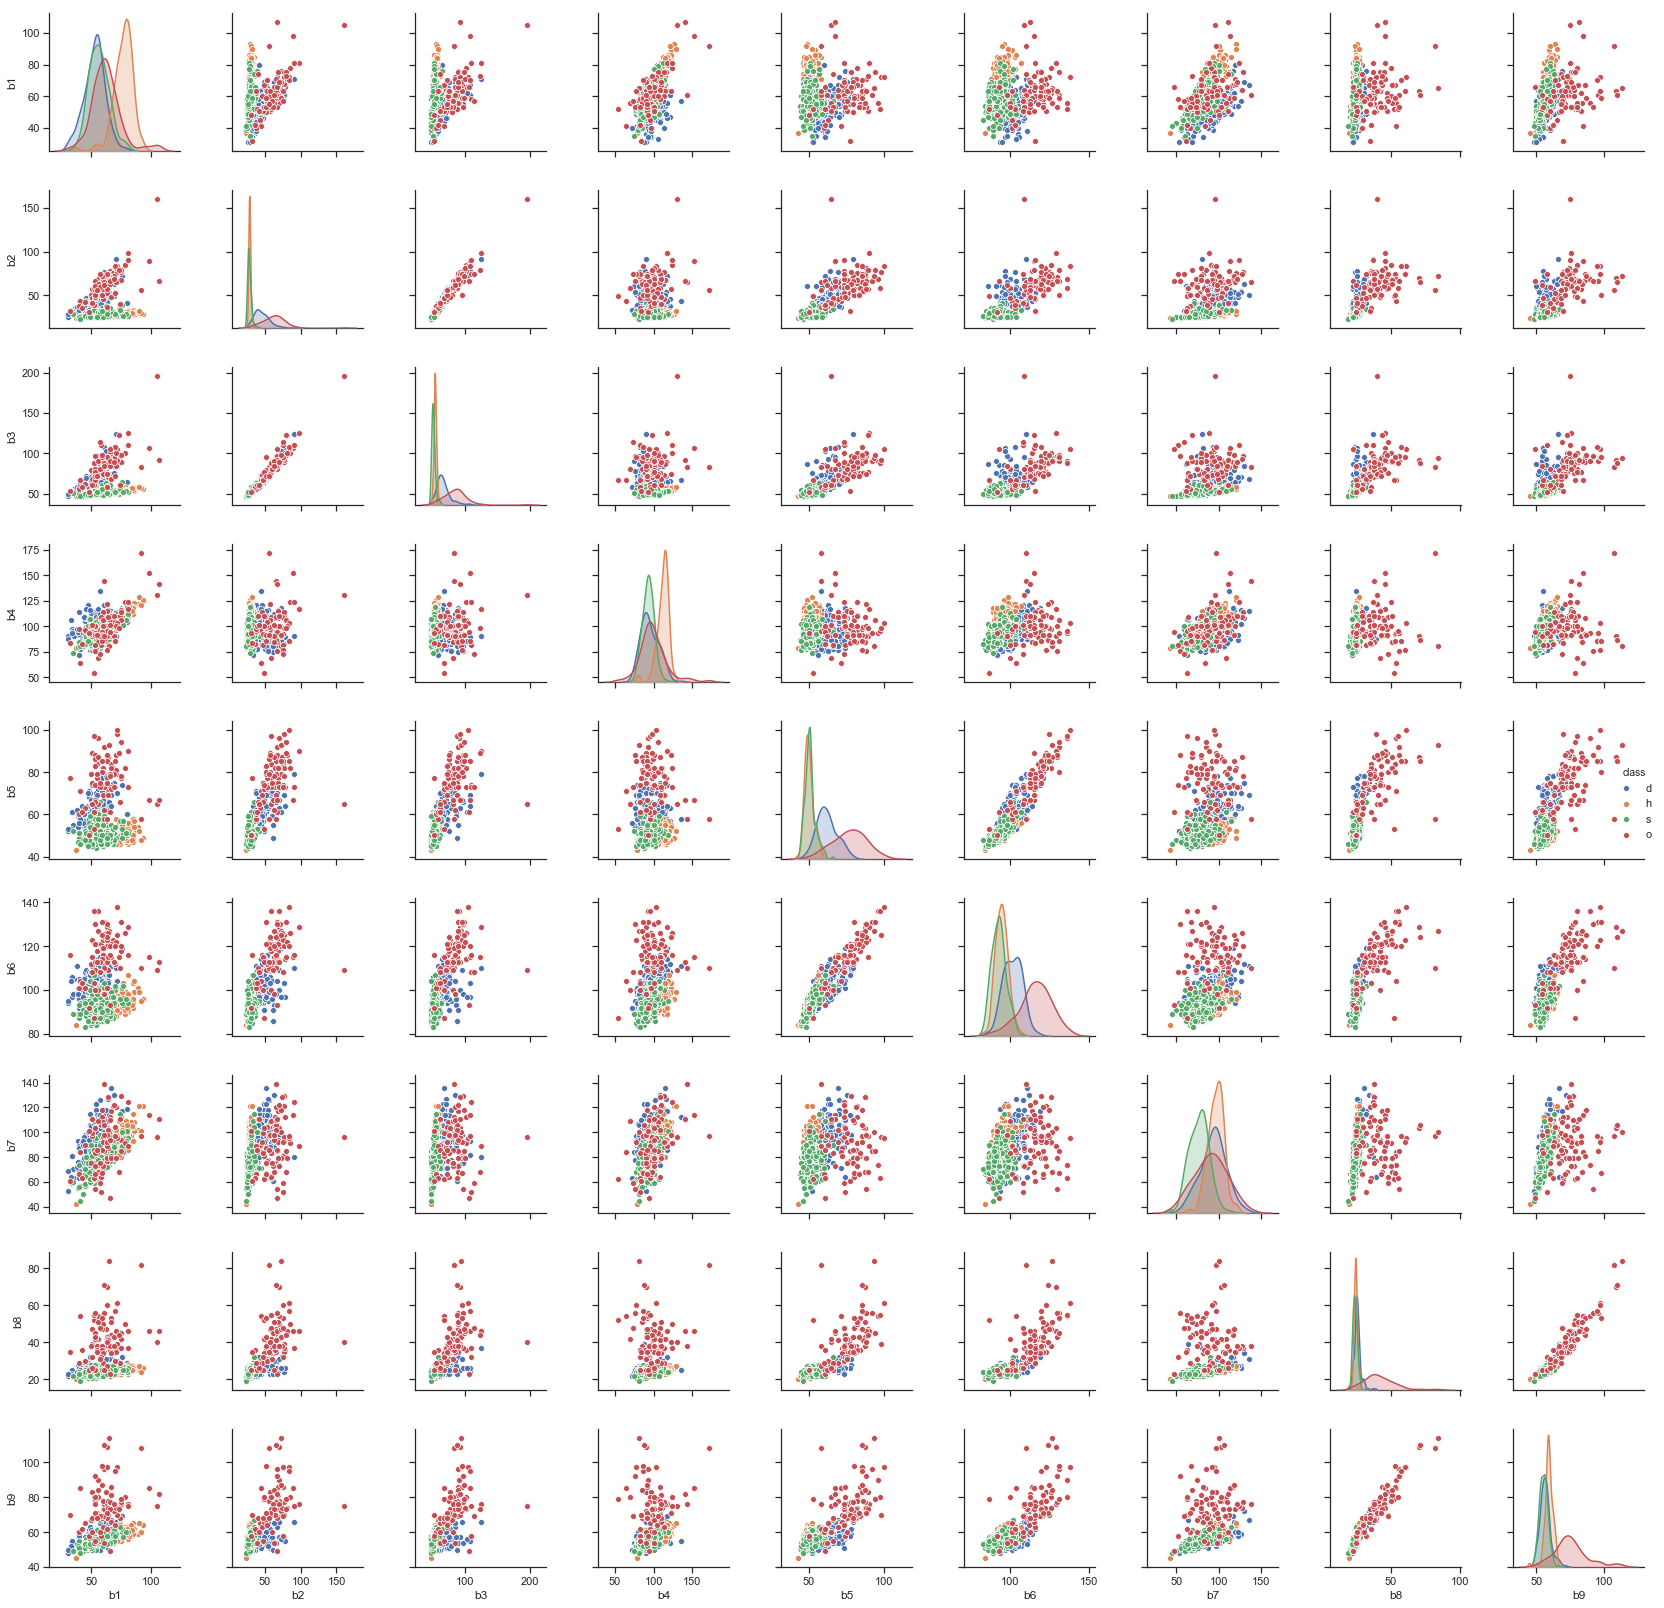

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)
cols = ['class', 'b1', 'b2', 'b3','b4','b5','b5','b6','b7','b8','b9']

cols = ['class','b1','b2','b3','b4','b5','b6','b7','b8','b9']
sns.pairplot(df_tree[cols], hue="class", size = 2.5)

plt.tight_layout()
# plt.savefig('images/10_03.png', dpi=300)
plt.show()

In [7]:
#df_tree = pd.DataFrame(df_tree)
#df_tree = df_tree.replace(to_replace=['d','h','o','s'], 
                #value=['1','2','3','4'], regex=True)

class_mapping={label:idx for idx,label in enumerate(np.unique(df_tree['class']))}
df_tree['class']=df_tree['class'].map(class_mapping)

#y=df.iloc[0:523,0].values
#change the features to test the accuracy
X, y = df_tree.iloc[:, 1:].values, df_tree.iloc[:, 0].values

print(df_tree)

     class  b1  b2   b3   b4  b5   b6   b7  b8  b9         ...           \
0        0  39  36   57   91  59  101   93  27  60         ...            
1        1  84  30   57  112  51   98   92  26  62         ...            
2        3  53  25   49   99  51   93   84  26  58         ...            
3        3  59  26   49  103  47   92   82  25  56         ...            
4        0  57  49   66  103  64  106  114  28  59         ...            
5        1  85  28   56  120  52   98  101  27  65         ...            
6        3  56  29   50   93  51   94   77  26  58         ...            
7        0  40  39   58   82  61   99   89  26  57         ...            
8        3  53  27   49   95  49   92   63  25  54         ...            
9        2  51  57   77   90  89  123   97  47  83         ...            
10       0  34  32   53   97  53   97   59  22  50         ...            
11       2  75  68   89  116  77  118   94  42  76         ...            
12       2  64  52   71  

In [8]:
from sklearn.model_selection import train_test_split

X, y = df_tree.iloc[:, 1:].values, df_tree.iloc[:, 0].values

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, 
                     stratify=y,
                     random_state=0)

In [9]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [10]:
#We used the PCA

In [11]:
import numpy as np
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

print('\nEigenvalues \n%s' % eigen_vals)


Eigenvalues 
[1.04593652e+01 4.95490271e+00 3.74299607e+00 1.91522706e+00
 1.46219191e+00 1.29526292e+00 8.60740362e-01 5.90115948e-01
 5.18234709e-01 3.76694998e-01 3.29263153e-01 1.80755211e-01
 1.12034105e-01 7.49162439e-02 6.72960959e-02 3.32110997e-02
 2.95535515e-02 2.66656262e-02 1.96283469e-02 1.06962382e-02
 7.22658754e-03 3.27301378e-03 2.55672697e-03 8.17254361e-04
 2.27581745e-04 9.61935048e-05 2.37186123e-05]


In [12]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

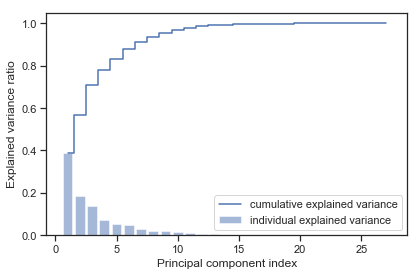

In [13]:
import matplotlib.pyplot as plt


plt.bar(range(1, 28), var_exp, alpha=0.5, align='center',
        label='individual explained variance')
plt.step(range(1, 28), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('images/05_02.png', dpi=300)
plt.show()

In [16]:
#10+ components were needed to reach ~1.0 Explained Variance Ratio

In [17]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [18]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

Matrix W:
 [[-0.11983385  0.05251725]
 [-0.2695716   0.06833551]
 [-0.26675208  0.06605848]
 [-0.10168101  0.0504802 ]
 [-0.26269727  0.07208362]
 [-0.26604062  0.075097  ]
 [-0.15108034  0.07763452]
 [-0.26095447  0.0634106 ]
 [-0.26778203  0.07065713]
 [ 0.12799432  0.00068419]
 [ 0.26605653 -0.05501944]
 [ 0.25852025 -0.03715299]
 [ 0.12264503  0.02158859]
 [ 0.26348492 -0.06395491]
 [ 0.27315897 -0.04442198]
 [ 0.16051734 -0.0277948 ]
 [ 0.26139372 -0.04011019]
 [ 0.27005357 -0.04157857]
 [-0.06564479 -0.22675853]
 [-0.05850757 -0.31737682]
 [-0.06253432 -0.34467232]
 [-0.09244042 -0.28297193]
 [-0.07800431 -0.35619556]
 [-0.08422292 -0.37897407]
 [-0.08363384 -0.28417005]
 [-0.06527494 -0.33354977]
 [-0.06581538 -0.36223219]]


In [19]:
X_train_std[0].dot(w)

array([-0.6974476 , -1.09415849])

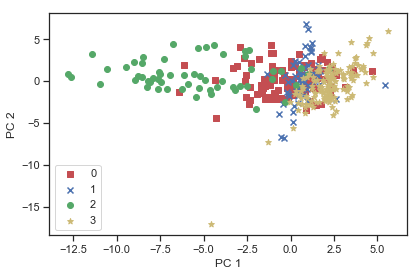

In [20]:
X_train_pca = X_train_std.dot(w)
colors = ['r', 'b', 'g', 'y']
markers = ['s', 'x', 'o', '*']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == l, 0], 
                X_train_pca[y_train == l, 1], 
                c=c, label=l, marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('images/05_03.png', dpi=300)
plt.show()

In [21]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([3.86325469e-01, 1.83013508e-01, 1.38250715e-01, 7.07405257e-02,
       5.40072906e-02, 4.78416278e-02, 3.17921708e-02, 2.17964300e-02,
       1.91414358e-02, 1.39135473e-02, 1.21616121e-02, 6.67634610e-03,
       4.13807410e-03, 2.76709462e-03, 2.48563803e-03, 1.22667996e-03,
       1.09158534e-03, 9.84917381e-04, 7.24989539e-04, 3.95074574e-04,
       2.66920102e-04, 1.20891523e-04, 9.44348658e-05, 3.01859787e-05,
       8.40592358e-06, 3.55298818e-06, 8.76066940e-07])

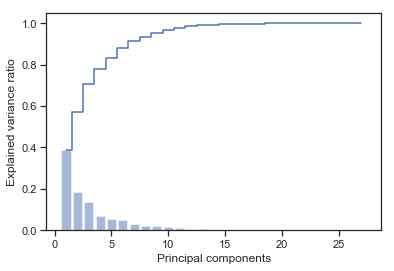

In [22]:
plt.bar(range(1, 28), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 28), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')

plt.show()

In [23]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

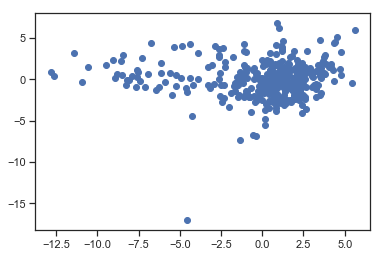

In [30]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])
X_train_pca = X_train_std.dot(w)

# plt.savefig('images/05_03.png', dpi=300)
plt.show()

In [ ]:
colors = ['r', 'b', 'g', 'y']
markers = ['s', 'x', 'o', '*']



for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == l, 0], 
                X_train_pca[y_train == l, 1], 
                c=c, label=l, marker=m)
    plt.legend(loc='lower left')
plt.tight_layout()

In [31]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '*', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

In [32]:
from sklearn.linear_model import LogisticRegression

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

lr = LogisticRegression()
lr = lr.fit(X_train_pca, y_train)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

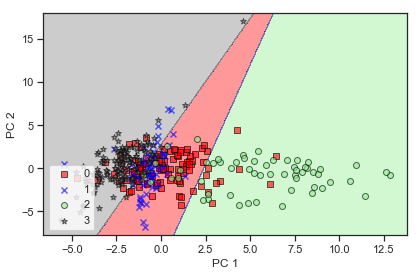

In [33]:
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('images/05_04.png', dpi=300)
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

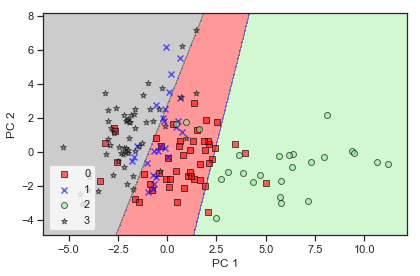

In [34]:
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('images/05_05.png', dpi=300)
plt.show()

In [35]:
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([3.86325469e-01, 1.83013508e-01, 1.38250715e-01, 7.07405257e-02,
       5.40072906e-02, 4.78416278e-02, 3.17921708e-02, 2.17964300e-02,
       1.91414358e-02, 1.39135473e-02, 1.21616121e-02, 6.67634610e-03,
       4.13807410e-03, 2.76709462e-03, 2.48563803e-03, 1.22667996e-03,
       1.09158534e-03, 9.84917381e-04, 7.24989539e-04, 3.95074574e-04,
       2.66920102e-04, 1.20891523e-04, 9.44348658e-05, 3.01859787e-05,
       8.40592358e-06, 3.55298818e-06, 8.76066940e-07])

In [36]:
#LDA
#Supervised data compression via linear discriminant analysis

np.set_printoptions(precision=4)

mean_vecs = []
for label in range(0, 4):
    print(label)
    mean_vecs.append(np.mean(X_train_std[y_train == label], axis=0))
    print('MV %s: %s\n' % (label, mean_vecs[label]))

0
MV 0: [-0.539   0.3759  0.2922 -0.2733  0.3401  0.1801  0.2635 -0.2264 -0.3646
  0.5124 -0.3809 -0.3     0.2662 -0.3442 -0.1915 -0.2587  0.2341  0.375
  0.0158 -0.0538 -0.0705  0.1304  0.0215 -0.0065  0.0511 -0.0179 -0.0218]

1
MV 1: [ 1.3368e+00 -6.2210e-01 -4.7002e-01  1.0597e+00 -6.9575e-01 -4.5556e-01
  5.8073e-01 -3.4120e-01 -4.7900e-04 -1.3090e+00  5.9437e-01  4.1168e-01
 -9.7947e-01  6.9552e-01  4.5161e-01 -5.5645e-01  3.5478e-01  7.7556e-03
 -2.3813e-03 -1.0120e-01 -1.3151e-01 -8.1901e-02 -2.4465e-01 -2.0943e-01
  3.7508e-03 -3.7541e-02 -2.5028e-02]

2
MV 2: [ 0.3268  1.4858  1.4459  0.3176  1.5845  1.631   0.4436  1.7806  1.7756
 -0.3316 -1.4454 -1.3565 -0.4012 -1.5836 -1.6482 -0.4728 -1.7803 -1.7787
  0.1664  0.1351  0.1268  0.2259  0.1813  0.2139  0.2211  0.1187  0.0801]

3
MV 3: [-0.2871 -0.6611 -0.643  -0.3772 -0.6416 -0.6369 -0.6557 -0.421  -0.4561
  0.2985  0.6602  0.6371  0.3832  0.6447  0.6551  0.6535  0.4087  0.4458
 -0.0822  0.0307  0.0611 -0.1654  0.013   0.0064 -

In [37]:
d = 27 # number of features
S_W = np.zeros((d, d))
for label, mv in zip(range(0, 4), mean_vecs):
    class_scatter = np.zeros((d, d))  # scatter matrix for each class
    for row in X_train_std[y_train == label]:
        row, mv = row.reshape(d, 1), mv.reshape(d, 1)  # make column vectors
        class_scatter += (row - mv).dot((row - mv).T)
    S_W += class_scatter                          # sum class scatter matrices

print('Within-class scatter matrix: %sx%s' % (S_W.shape[0], S_W.shape[1]))

Within-class scatter matrix: 27x27


In [38]:
mean_overall = np.mean(X_train_std, axis=0)
d = 27  # number of features
S_B = np.zeros((d, d))
for i, mean_vec in enumerate(mean_vecs):
    n = X_train[y_train == i + 1, :].shape[0]
    mean_vec = mean_vec.reshape(d, 1)  # make column vector
    mean_overall = mean_overall.reshape(d, 1)  # make column vector
    S_B += n * (mean_vec - mean_overall).dot((mean_vec - mean_overall).T)

print('Between-class scatter matrix: %sx%s' % (S_B.shape[0], S_B.shape[1]))

Between-class scatter matrix: 27x27


In [39]:
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

In [40]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues

print('Eigenvalues in descending order:\n')
for eigen_val in eigen_pairs:
    print(eigen_val[0])

Eigenvalues in descending order:

7.103299074880182
1.4962812198864937
0.2093653137539164
1.2918920298186837e-11
1.2918920298186837e-11
3.2817765375608893e-12
1.287729311992266e-12
1.2861731654161634e-12
1.2861731654161634e-12
8.200985542338069e-13
5.538481212727656e-13
5.538481212727656e-13
1.2539794181892555e-13
1.201884478753581e-13
1.201884478753581e-13
7.158007958946355e-14
7.158007958946355e-14
2.053967231690423e-14
1.5190610547362474e-14
1.5190610547362474e-14
1.3307958961199142e-14
1.2126648587247955e-14
1.2126648587247955e-14
5.048423170746816e-15
5.048423170746816e-15
3.173356603389598e-15
6.300195861327078e-16


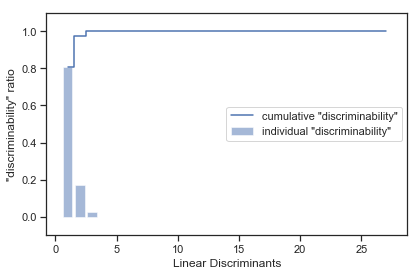

In [41]:
tot = sum(eigen_vals.real)
discr = [(i / tot) for i in sorted(eigen_vals.real, reverse=True)]
cum_discr = np.cumsum(discr)

plt.bar(range(1, 28), discr, alpha=0.5, align='center',
        label='individual "discriminability"')
plt.step(range(1, 28), cum_discr, where='mid',
         label='cumulative "discriminability"')
plt.ylabel('"discriminability" ratio')
plt.xlabel('Linear Discriminants')
plt.ylim([-0.1, 1.1])
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('images/05_07.png', dpi=300)
plt.show()

In [42]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis].real,
              eigen_pairs[1][1][:, np.newaxis].real))
print('Matrix W:\n', w)

Matrix W:
 [[ 0.0064  0.0458]
 [-0.3998  0.293 ]
 [ 0.244  -0.3037]
 [ 0.0122 -0.137 ]
 [ 0.359  -0.3891]
 [-0.0081  0.3918]
 [-0.025   0.0801]
 [ 0.3131  0.0713]
 [-0.3468 -0.08  ]
 [-0.0871  0.1382]
 [-0.2372  0.237 ]
 [ 0.1804 -0.324 ]
 [ 0.0215 -0.1148]
 [ 0.3709 -0.3588]
 [ 0.0163  0.3578]
 [-0.0185  0.0077]
 [ 0.3382 -0.0639]
 [-0.2844  0.1461]
 [-0.0295  0.0161]
 [ 0.0009 -0.0144]
 [ 0.0117  0.0016]
 [ 0.0029 -0.0074]
 [ 0.0128  0.0082]
 [-0.0099  0.0159]
 [ 0.0083 -0.0143]
 [-0.0213 -0.0229]
 [ 0.0225  0.031 ]]


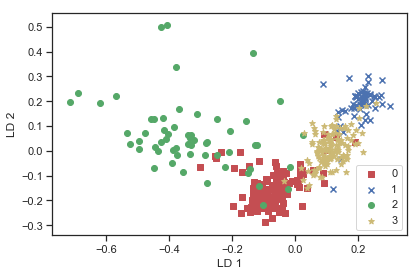

In [43]:
X_train_lda = X_train_std.dot(w)
colors = ['r', 'b', 'g', 'y']
markers = ['s', 'x', 'o', '*']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_lda[y_train == l, 0],
                X_train_lda[y_train == l, 1] * (-1),
                c=c, label=l, marker=m)

plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower right')
plt.tight_layout()
# plt.savefig('images/05_08.png', dpi=300)
plt.show()

In [44]:
#LDA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

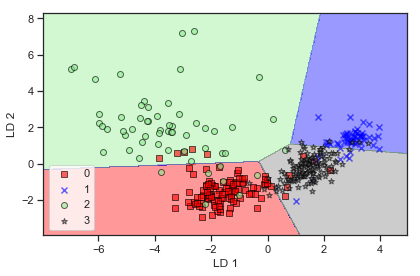

In [152]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr = lr.fit(X_train_lda, y_train)

plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('images/05_09.png', dpi=300)
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

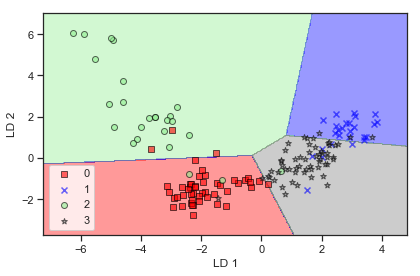

Misclassified samples: 19
Accuracy: 0.878981


In [153]:
X_test_lda = lda.transform(X_test_std)

plot_decision_regions(X_test_lda, y_test, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('images/05_10.png', dpi=300)
plt.show()

y_pred=lr.predict(X_test_lda)
print('Misclassified samples: %d'%(y_test != y_pred).sum())

from sklearn.metrics import accuracy_score
print('Accuracy: %2f' % accuracy_score(y_test,y_pred))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

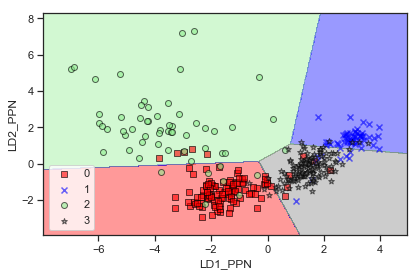

In [154]:
from sklearn.linear_model import Perceptron
ppn=Perceptron(n_iter=40,eta0=0.1,random_state=1)
ppn.fit(X_train_lda,y_train)

plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('LD1_PPN')
plt.ylabel('LD2_PPN')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('images/05_09.png', dpi=300)
plt.show()

In [155]:
y_pred=ppn.predict(X_test_lda)
print('Misclassified samples: %d'%(y_test != y_pred).sum())

from sklearn.metrics import accuracy_score
print('Accuracy: %2f' % accuracy_score(y_test,y_pred))

Misclassified samples: 20
Accuracy: 0.872611


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

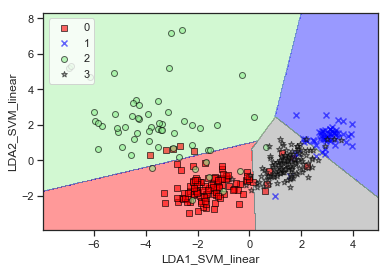

In [156]:
from sklearn.svm import SVC


svm=SVC(kernel='linear',C=1.0,random_state=1)
svm.fit(X_train_lda,y_train)
plot_decision_regions(X_train_lda, y_train, classifier=svm)

plt.xlabel('LDA1_SVM_linear')
plt.ylabel('LDA2_SVM_linear')
plt.legend(loc='upper left')

plt.show()


In [157]:
y_pred=svm.predict(X_test_lda)
print('Misclassified samples: %d'%(y_test != y_pred).sum())

from sklearn.metrics import accuracy_score
print('Accuracy: %2f' % accuracy_score(y_test,y_pred))

Misclassified samples: 15
Accuracy: 0.904459


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

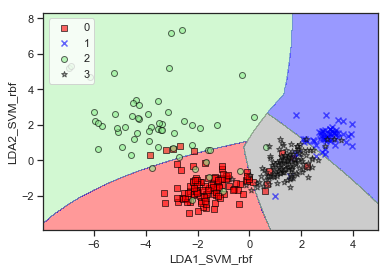

In [158]:
svm2=SVC(kernel='rbf',random_state=1,gamma=0.01,C=10.0)
svm2.fit(X_train_lda,y_train)
plot_decision_regions(X_train_lda, y_train, classifier=svm2)

plt.xlabel('LDA1_SVM_rbf')
plt.ylabel('LDA2_SVM_rbf')
plt.legend(loc='upper left')

plt.show()

In [159]:
y_pred=svm2.predict(X_test_lda)
print('Misclassified samples: %d'%(y_test != y_pred).sum())

from sklearn.metrics import accuracy_score
print('Accuracy: %2f' % accuracy_score(y_test,y_pred))

Misclassified samples: 16
Accuracy: 0.898089


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

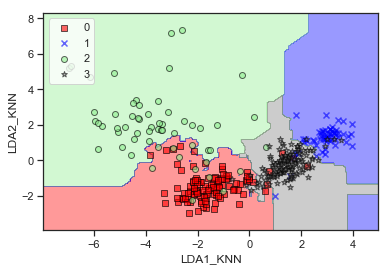

In [160]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=4,p=1,metric='minkowski')
knn.fit(X_train_lda,y_train)

plot_decision_regions(X_train_lda, y_train, classifier=knn)

plt.xlabel('LDA1_KNN')
plt.ylabel('LDA2_KNN')
plt.legend(loc='upper left')

plt.show()

In [161]:
y_pred=knn.predict(X_test_lda)
print('Misclassified samples: %d'%(y_test != y_pred).sum())

from sklearn.metrics import accuracy_score
print('Accuracy: %2f' % accuracy_score(y_test,y_pred))

Misclassified samples: 21
Accuracy: 0.866242


In [162]:
# Majority Voting

from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
clf1 = LogisticRegression(penalty='l2', 
                          C=0.001,
                          random_state=1)

clf2 = Perceptron(n_iter=40,eta0=0.1,random_state=1)

clf3 = KNeighborsClassifier(n_neighbors=1,
                            p=2,
                            metric='minkowski')

clf4=SVC(kernel='linear',C=1.0,random_state=1)

clf5=SVC(kernel='rbf',random_state=1,gamma=0.2,C=10.0)

pipe1 = Pipeline([['sc', StandardScaler()],
                  ['clf', clf1]])
pipe2 = Pipeline([['sc', StandardScaler()],
                  ['clf', clf2]])
pipe3 = Pipeline([['sc', StandardScaler()],
                  ['clf', clf3]])
pipe4 = Pipeline([['sc', StandardScaler()],
                  ['clf', clf4]])
pipe5 = Pipeline([['sc', StandardScaler()],
                  ['clf', clf5]])

clf_labels = ['Logistic regression','Perceptron ','KNN','SVM_linear', 'SVM_rbf']

print('10-fold cross validation:\n')
for clf, label in zip([pipe1, pipe2, pipe3,pipe4,pipe5], clf_labels):
    scores = cross_val_score(estimator=clf,
                             X=X_train_lda,
                             y=y_train,
                             cv=10)
                            # scoring='roc_auc')
    print("ROC AUC: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))

10-fold cross validation:

ROC AUC: 0.77 (+/- 0.05) [Logistic regression]
ROC AUC: 0.71 (+/- 0.14) [Perceptron ]
ROC AUC: 0.84 (+/- 0.04) [KNN]
ROC AUC: 0.90 (+/- 0.03) [SVM_linear]
ROC AUC: 0.89 (+/- 0.04) [SVM_rbf]


In [163]:
from sklearn.base import BaseEstimator
from sklearn.base import ClassifierMixin
from sklearn.preprocessing import LabelEncoder
from sklearn.externals import six
from sklearn.base import clone
from sklearn.pipeline import _name_estimators
import numpy as np
import operator


class MajorityVoteClassifier(BaseEstimator, 
                             ClassifierMixin):
    """ A majority vote ensemble classifier

    Parameters
    ----------
    classifiers : array-like, shape = [n_classifiers]
      Different classifiers for the ensemble

    vote : str, {'classlabel', 'probability'} (default='label')
      If 'classlabel' the prediction is based on the argmax of
        class labels. Else if 'probability', the argmax of
        the sum of probabilities is used to predict the class label
        (recommended for calibrated classifiers).

    weights : array-like, shape = [n_classifiers], optional (default=None)
      If a list of `int` or `float` values are provided, the classifiers
      are weighted by importance; Uses uniform weights if `weights=None`.

    """
    def __init__(self, classifiers, vote='classlabel', weights=None):
        self.classifiers = classifiers
        self.named_classifiers = {key: value for key, value
                                  in _name_estimators(classifiers)}
        self.vote = vote
        self.weights = weights

    def fit(self, X, y):
        """ Fit classifiers.

        Parameters
        ----------
        X : {array-like, sparse matrix}, shape = [n_samples, n_features]
            Matrix of training samples.

        y : array-like, shape = [n_samples]
            Vector of target class labels.

        Returns
        -------
        self : object

        """
        if self.vote not in ('probability', 'classlabel'):
            raise ValueError("vote must be 'probability' or 'classlabel'"
                             "; got (vote=%r)"
                             % self.vote)
            
        if self.weights and len(self.weights) != len(self.classifiers):
            raise ValueError('Number of classifiers and weights must be equal'
                             '; got %d weights, %d classifiers'
                             % (len(self.weights), len(self.classifiers)))

        # Use LabelEncoder to ensure class labels start with 0, which
        # is important for np.argmax call in self.predict
        self.lablenc_ = LabelEncoder()
        self.lablenc_.fit(y)
        self.classes_ = self.lablenc_.classes_
        self.classifiers_ = []
        for clf in self.classifiers:
            fitted_clf = clone(clf).fit(X, self.lablenc_.transform(y))
            self.classifiers_.append(fitted_clf)
        return self

    def predict(self, X):
        """ Predict class labels for X.

        Parameters
        ----------
        X : {array-like, sparse matrix}, shape = [n_samples, n_features]
            Matrix of training samples.

        Returns
        ----------
        maj_vote : array-like, shape = [n_samples]
            Predicted class labels.
            
        """
        if self.vote == 'probability':
            maj_vote = np.argmax(self.predict_proba(X), axis=1)
        else:  # 'classlabel' vote

 #  Collect results from clf.predict calls
            predictions = np.asarray([clf.predict(X)
                                      for clf in self.classifiers_]).T

            maj_vote = np.apply_along_axis(
                                      lambda x:
                                      np.argmax(np.bincount(x,
                                                weights=self.weights)),
                                      axis=1,
                                      arr=predictions)
        maj_vote = self.lablenc_.inverse_transform(maj_vote)
        return maj_vote

    def predict_proba(self, X):
        """ Predict class probabilities for X.

        Parameters
        ----------
        X : {array-like, sparse matrix}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.

        Returns
        ----------
        avg_proba : array-like, shape = [n_samples, n_classes]
            Weighted average probability for each class per sample.

        """
        probas = np.asarray([clf.predict_proba(X)
                             for clf in self.classifiers_])
        avg_proba = np.average(probas, axis=0, weights=self.weights)
        return avg_proba

    def get_params(self, deep=True):
        """ Get classifier parameter names for GridSearch"""
        if not deep:
            return super(MajorityVoteClassifier, self).get_params(deep=False)
        else:
            out = self.named_classifiers.copy()
            for name, step in six.iteritems(self.named_classifiers):
                for key, value in six.iteritems(step.get_params(deep=True)):
                    out['%s__%s' % (name, key)] = value
            return out

In [164]:
# Majority Rule (hard) Voting

mv_clf = MajorityVoteClassifier(classifiers=[pipe1, pipe2, pipe3 ,pipe4, pipe5])

clf_labels += ['Majority voting']
all_clf = [pipe1, clf2, pipe3,pipe4,pipe5, mv_clf]

for clf, label in zip(all_clf, clf_labels):
    scores = cross_val_score(estimator=clf,
                             X=X_train,
                             y=y_train,
                             cv=10)
                             #scoring='roc_auc')
    print("ROC AUC: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))

ROC AUC: 0.80 (+/- 0.04) [Logistic regression]
ROC AUC: 0.75 (+/- 0.13) [Perceptron ]
ROC AUC: 0.79 (+/- 0.05) [KNN]
ROC AUC: 0.91 (+/- 0.04) [SVM_linear]
ROC AUC: 0.83 (+/- 0.07) [SVM_rbf]
ROC AUC: 0.89 (+/- 0.04) [Majority voting]


In [165]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
colors = ['black', 'orange', 'blue', 'green']
linestyles = [':', '--', '-.', '-']
for clf, label, clr, ls \
        in zip(all_clf,
               clf_labels, colors, linestyles):

    # assuming the label of the positive class is 1
    y_pred = clf.fit(X_train,
                     y_train).predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_true=y_test,
                                     y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)
    plt.plot(fpr, tpr,
             color=clr,
             linestyle=ls,
             label='%s (auc = %0.2f)' % (label, roc_auc))

plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1],
         linestyle='--',
         color='gray',
         linewidth=2)

plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')


#plt.savefig('images/07_04', dpi=300)
plt.show()

ValueError: multiclass format is not supported